<a href="https://colab.research.google.com/github/IC-UFAL-IADD/IADD/blob/codebasics/%5B2021_PADRAO%5D_OrganizacaoDataset_DICOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#################################################

** Created by Prof. Dr. Marcelo Oliveira on 22/11/2021. 

** Disciplina de Fundametos de IA aplicados ao Diagnóstico de Doenças. 

** Copyright (c)2020 Instituto de Computação ** 

** Universidade Federal de Alagoas - UFAL. All rights reserved.**

################################################# 

References:

- (1) Recomenda resolucao de radiografia (between 256 × 256 and 448 × 448 pixels). The Effect of Image Resolution on Deep Learning in Radiography (https://doi.org/10.1148/ryai.2019190015)
- (2) Preparing Medical Imaging Data for Machine Learning. https://doi.org/10.1148/radiol.2020192224

### Requerimentos: pydicom, scikit-image, kornia, fastai 

*   pip install fastai --upgrade -q


In [ ]:
!pip install git+https://github.com/fastai/fastai.git
!pip install opencv-python
!pip install pydicom
!pip install kornia
!pip install skimage 
!pip install seaborn

Instalacao dos pacotes: GDCM: manipulacao do DICOM; 

In [4]:
!pip install python-gdcm -q

In [3]:
import os
import numpy as np
import shutil
import random

#FastAI loaders
from fastai.vision.all import *
from fastai.medical.imaging import *
import pydicom
import os
import shutil
import cv2
from pydicom.pixel_data_handlers.util import apply_voi_lut
import gdcm
from torchvision.utils import save_image
#import fastai.vision
#from fastai.vision.all import *


Para organizar um Dataset com imagens para Treinamento e Teste usaremos o "SplitFolder"

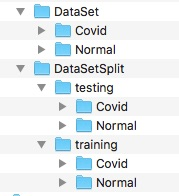


In [ ]:
#import splitfolders 
#output = ".../DataSetSplit"
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`. Or training, validation and tste (.8, .1. ,1) or (70,15,15)`
#splitfolders.ratio(DataSet, output="DataSetSplit", seed=1337, ratio=(.8, .2), group_prefix=None) # default values


In [ ]:
!touch "/content/drive/My Drive/ping.txt"

In [ ]:
#Link compartilhado pelo Drive: https://drive.google.com/drive/folders/1dmjHlE-DgBJmADmN50vCnARA9LuY2APO?usp=sharing
path = Path("/content/drive/My Drive/DataSets/IADD/DataSetSplit/")

In [ ]:
#to list the contents 
path.ls()

(#2) [Path('/content/drive/My Drive/DataSets/IADD/DataSetSplit/training'),Path('/content/drive/My Drive/DataSets/IADD/DataSetSplit/testing')]

# Loading Data

In [ ]:
dls = ImageDataLoaders.from_folder(path=path, 
                                   train='training', 
                                   valid='testing', 
                                   shuffle=True, 
                                   item_tfms=Resize(448)  #Coloca todas as imagens com a mesma resolucao espacial
                                   )

/usr/local/lib/python3.7/dist-packages/torch/overrides.py:1351: DeprecationWarning: Defining your `__torch_function__ as a plain method is deprecated and will be an error in PyTorch 1.11, please define it as a classmethod.
  DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/torch/overrides.py:1351: DeprecationWarning: Defining your `__torch_function__ as a plain method is deprecated and will be an error in PyTorch 1.11, please define it as a classmethod.
  DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/torch/overrides.py:1351: DeprecationWarning: Defining your `__torch_function__ as a plain method is deprecated and will be an error in PyTorch 1.11, please define it as a classmethod.
  DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/torch/overrides.py:1351: DeprecationWarning: Defining your `__torch_function__ as a plain method is deprecated and will be an error in PyTorch 1.11, please define it as a classmethod.
  DeprecationWarning)
/usr/local/lib/pytho

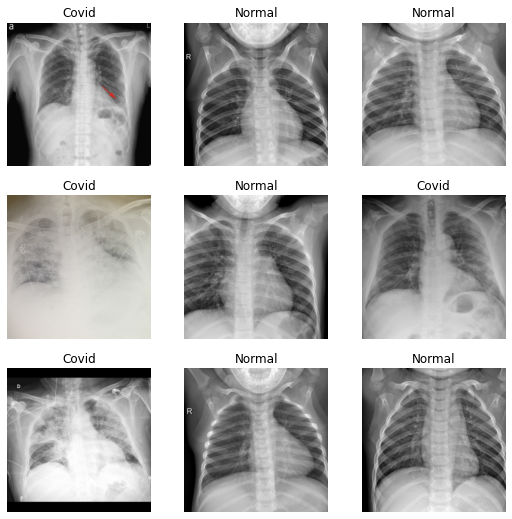

In [ ]:
dls.train.show_batch()

/usr/local/lib/python3.7/dist-packages/torch/overrides.py:1351: DeprecationWarning: Defining your `__torch_function__ as a plain method is deprecated and will be an error in PyTorch 1.11, please define it as a classmethod.
  DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/torch/overrides.py:1351: DeprecationWarning: Defining your `__torch_function__ as a plain method is deprecated and will be an error in PyTorch 1.11, please define it as a classmethod.
  DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/torch/overrides.py:1351: DeprecationWarning: Defining your `__torch_function__ as a plain method is deprecated and will be an error in PyTorch 1.11, please define it as a classmethod.
  DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/torch/overrides.py:1351: DeprecationWarning: Defining your `__torch_function__ as a plain method is deprecated and will be an error in PyTorch 1.11, please define it as a classmethod.
  DeprecationWarning)
/usr/local/lib/pytho

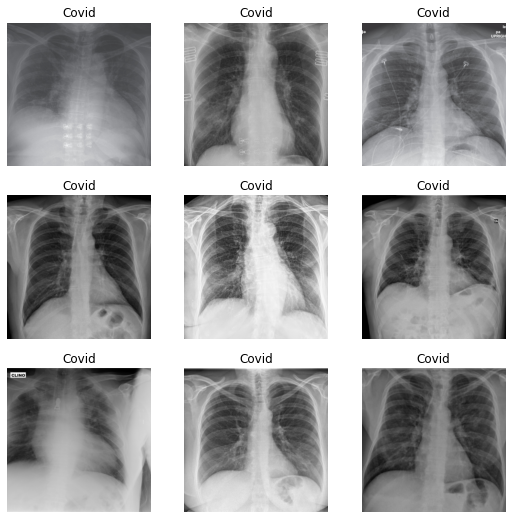

In [ ]:
dls.valid.show_batch()

# Organização Dataset DICOM

In [ ]:
#Load DataSet
dataSetPath = Path("/content/drive/My Drive/DataSets/IADD/siim-covid19-detection_Recorte")
print(os.listdir(dataSetPath))

['train_study_level.csv', 'sample_submission.csv', 'train_image_level.csv', 'test', 'train']


Uma ótima estratégia é organizar Dataset grandes usando o o seu Data Frame.


In [ ]:
train_image_level = pd.read_csv(f'{dataSetPath}/train_image_level.csv')
train_study_level = pd.read_csv(f'{dataSetPath}/train_study_level.csv')

# CSV descrevendo o Estudo

In [ ]:
'''
  Os id_study foram criados a partir do StudyInstanceUID (tag DICOM) 
  e dao nome a cada um dos Folders onde estão localizadas as imagens .dcm
'''
train_study_level.head(5) 

,id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,00086460a852_study,0,1,0,0
1,000c9c05fd14_study,0,0,0,1
2,00292f8c37bd_study,1,0,0,0
3,005057b3f880_study,1,0,0,0
4,0051d9b12e72_study,0,0,0,1


# CSV com dados da COVID em cada Imagem DICOM

In [ ]:
train_image_level.head(5)
'''
  Aqui os id são os nomes dos arquivos DICOM. 
'''

'\n  Aqui os id são os nomes dos arquivos DICOM. \n'

In [ ]:
#Vamos renomer os arquivos para .dcm
train_image_level['id'] = train_image_level['id'].apply(lambda x: f'{x[:12]}'+ ".dcm")
train_image_level.head(5)

,id,boxes,label,StudyInstanceUID
0,000a312787f2.dcm,"[{'x': 789.28836, 'y': 582.43035, 'width': 1026.65662, 'height': 1917.30292}, {'x': 2245.91208, 'y': 591.20528, 'width': 1094.66162, 'height': 1761.54944}]",opacity 1 789.28836 582.43035 1815.94498 2499.73327 opacity 1 2245.91208 591.20528 3340.5737 2352.75472,5776db0cec75
1,000c3a3f293f.dcm,NaN,none 1 0 0 1 1,ff0879eb20ed
2,0012ff7358bc.dcm,"[{'x': 677.42216, 'y': 197.97662, 'width': 867.79767, 'height': 999.78214}, {'x': 1792.69064, 'y': 402.5525, 'width': 617.02734, 'height': 1204.358}]",opacity 1 677.42216 197.97662 1545.21983 1197.75876 opacity 1 1792.69064 402.5525 2409.71798 1606.9105,9d514ce429a7
3,001398f4ff4f.dcm,"[{'x': 2729, 'y': 2181.33331, 'width': 948.00012, 'height': 604}]",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2
4,001bd15d1891.dcm,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'height': 1106}, {'x': 2578.56661, 'y': 998.66667, 'width': 662.66667, 'height': 1120}]",opacity 1 623.23328 1050 1337.23328 2156 opacity 1 2578.56661 998.66667 3241.23328 2118.66667,dfd9fdd85a3e


# Integrando os 2 DataFrames

Vamos usar a tag 'StudyInstanceUID' para "JUNTAR" o train_study_level + train_image_level, o que queremos é pegar o filename das imagens para organizar o DataSet.


---


### 1 Passo é renomear o nome da coluna id para StudyInstanceUID no train_study_level.csv

In [ ]:
train_study_level.rename(columns = {'id':'StudyInstanceUID'}, inplace=True)
train_study_level.head() 

,StudyInstanceUID,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,00086460a852_study,0,1,0,0
1,000c9c05fd14_study,0,0,0,1
2,00292f8c37bd_study,1,0,0,0
3,005057b3f880_study,1,0,0,0
4,0051d9b12e72_study,0,0,0,1




---


### 2 Passo: Remover o "_study" (agora sim temos o que ele de fato significa)

In [ ]:
train_study_level['StudyInstanceUID'] = train_study_level['StudyInstanceUID'].apply(lambda x: f'{x[:12]}')
train_study_level.head(5) 

,StudyInstanceUID,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,00086460a852,0,1,0,0
1,000c9c05fd14,0,0,0,1
2,00292f8c37bd,1,0,0,0
3,005057b3f880,1,0,0,0
4,0051d9b12e72,0,0,0,1


In [ ]:
train_image_level.head(3)

,id,boxes,label,StudyInstanceUID
0,000a312787f2.dcm,"[{'x': 789.28836, 'y': 582.43035, 'width': 1026.65662, 'height': 1917.30292}, {'x': 2245.91208, 'y': 591.20528, 'width': 1094.66162, 'height': 1761.54944}]",opacity 1 789.28836 582.43035 1815.94498 2499.73327 opacity 1 2245.91208 591.20528 3340.5737 2352.75472,5776db0cec75
1,000c3a3f293f.dcm,NaN,none 1 0 0 1 1,ff0879eb20ed
2,0012ff7358bc.dcm,"[{'x': 677.42216, 'y': 197.97662, 'width': 867.79767, 'height': 999.78214}, {'x': 1792.69064, 'y': 402.5525, 'width': 617.02734, 'height': 1204.358}]",opacity 1 677.42216 197.97662 1545.21983 1197.75876 opacity 1 1792.69064 402.5525 2409.71798 1606.9105,9d514ce429a7




---


### Vamos "Juntar" os 2 DataFrames

In [ ]:
merged = pd.merge(train_image_level, train_study_level, on='StudyInstanceUID')
merged.head(3)

,id,boxes,label,StudyInstanceUID,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,000a312787f2.dcm,"[{'x': 789.28836, 'y': 582.43035, 'width': 1026.65662, 'height': 1917.30292}, {'x': 2245.91208, 'y': 591.20528, 'width': 1094.66162, 'height': 1761.54944}]",opacity 1 789.28836 582.43035 1815.94498 2499.73327 opacity 1 2245.91208 591.20528 3340.5737 2352.75472,5776db0cec75,0,1,0,0
1,000c3a3f293f.dcm,NaN,none 1 0 0 1 1,ff0879eb20ed,1,0,0,0
2,0012ff7358bc.dcm,"[{'x': 677.42216, 'y': 197.97662, 'width': 867.79767, 'height': 999.78214}, {'x': 1792.69064, 'y': 402.5525, 'width': 617.02734, 'height': 1204.358}]",opacity 1 677.42216 197.97662 1545.21983 1197.75876 opacity 1 1792.69064 402.5525 2409.71798 1606.9105,9d514ce429a7,0,1,0,0




---

Proximo passo é Copiar as imagens Classificadas como:


*   Typical Appearance = 1 para o Folder COVID
*   Indeterminate Appearance e Atypical Appearance para COVID_Indeterminado




In [ ]:
def copyTrainExams(studyID, newPath):
    path = f'{dataSetPath}/train/' + studyID
    files = glob.glob(path + '/*' + '/*.dcm')
         
    for file in files:
        shutil.copy2(file, newPath)
        print(f'"Movendo imagem...: {file}")        

SyntaxError: ignored

In [ ]:
AtypicalAppearance = 1
IndeterminateAppearance = 1

atypicalAppearance_path = f'{dataSetPath}/AtypicalAppearance/'
os.makedirs(os.path.dirname(atypicalAppearance_path), exist_ok=True)
 
for (i,row) in merged.iterrows():
  if row["Atypical Appearance"] == AtypicalAppearance or row["Indeterminate Appearance"] ==  IndeterminateAppearance:
    studyID = row["StudyInstanceUID"]
    copyTrainExams(studyID, atypicalAppearance_path)  



---
Copiando os casos de Typical Appearance para o Folder COVID


In [ ]:
TypicalAppearance = 1


typicalAppearance_path = f'{dataSetPath}/typicalAppearance/'
os.makedirs(os.path.dirname(typicalAppearance_path), exist_ok=True)
 
for (i,row) in merged.iterrows():
  if row["Typical Appearance"] ==  TypicalAppearance: 
    studyID = row["StudyInstanceUID"]
    copyTrainExams(studyID, typicalAppearance_path) 
